<a href="https://colab.research.google.com/github/DIVYANSHI-PARASHAR/Machine-Learning-Projects/blob/master/Bank_Personal_Loan_Project_DIVYANSHI_PARASHAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MARKETING CAMPAIGN FOR BANKING PRODUCTS
# Divyanshi Parashar

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal
loans.

# Importing the Libraries


In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns                 #visualisation
import matplotlib.pyplot as plt       #visualisation
%matplotlib inline

# Importing the Dataset


In [2]:
# For Jupyter
# importing the dataset- Dataset is in the same folder as of this file

# dataset = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
# for google colab
from google.colab import files
uploaded = files.upload()                                   #importing the dataset


Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (7).csv


In [4]:
import io
dataset = pd.read_csv(r"Bank_Personal_Loan_Modelling.csv")   #reading the dataset

# Dataset

Data Description:
The file Bank.xls contains data on 5000 customers. The data includes customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

Data: https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

Context:

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

In [5]:
dataset.shape
#This tells the no. of columns and rows in the dataset

(5000, 14)

Above code shows the no. of rows and columns in the dataset

In [6]:
dataset.head()
#We can see the first 5 rows of the dataset along with column headings

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
dataset.columns = dataset.columns.str.replace(' ', '_')
#Replacing all the white spaces in column-names with an underscore sign

In [8]:
dataset.head()
#Now again let's have a look at the modified column names

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
dataset.tail(5)
#This displays the last 5 rows of the dataset

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Attribute Information:

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

# Checking types of data and basic summary stats

In [10]:
# this displays datatype of each column and the non-null rows for each column.
# basically it gives the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


From this, we see that all the columns have integer type data except 'CCAvg' that has float data. Also there are no null values in all the columns.

In [11]:
dataset.describe()
#gives description of the dataset. 
#For eg: mean, count(no. of enteries), std, min(minimum value), max(maximum value) etc.

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Here, we see the description of the data. For every column, we get count(no. of entries), mean of the values, std, minimum value, maximum value and much more.

In [12]:
#finding null values present in each column
print(dataset.isnull().sum())

# or: data.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


We see there are no null values

In [13]:
dataset.describe().transpose()
# just printed horizontally

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Above code shows the data description horizontally.

# Dropping Irrelevant Columns

First we will plot a pairplot to see many correlations between columns to find the irrelevant column, or any outlier in a column.

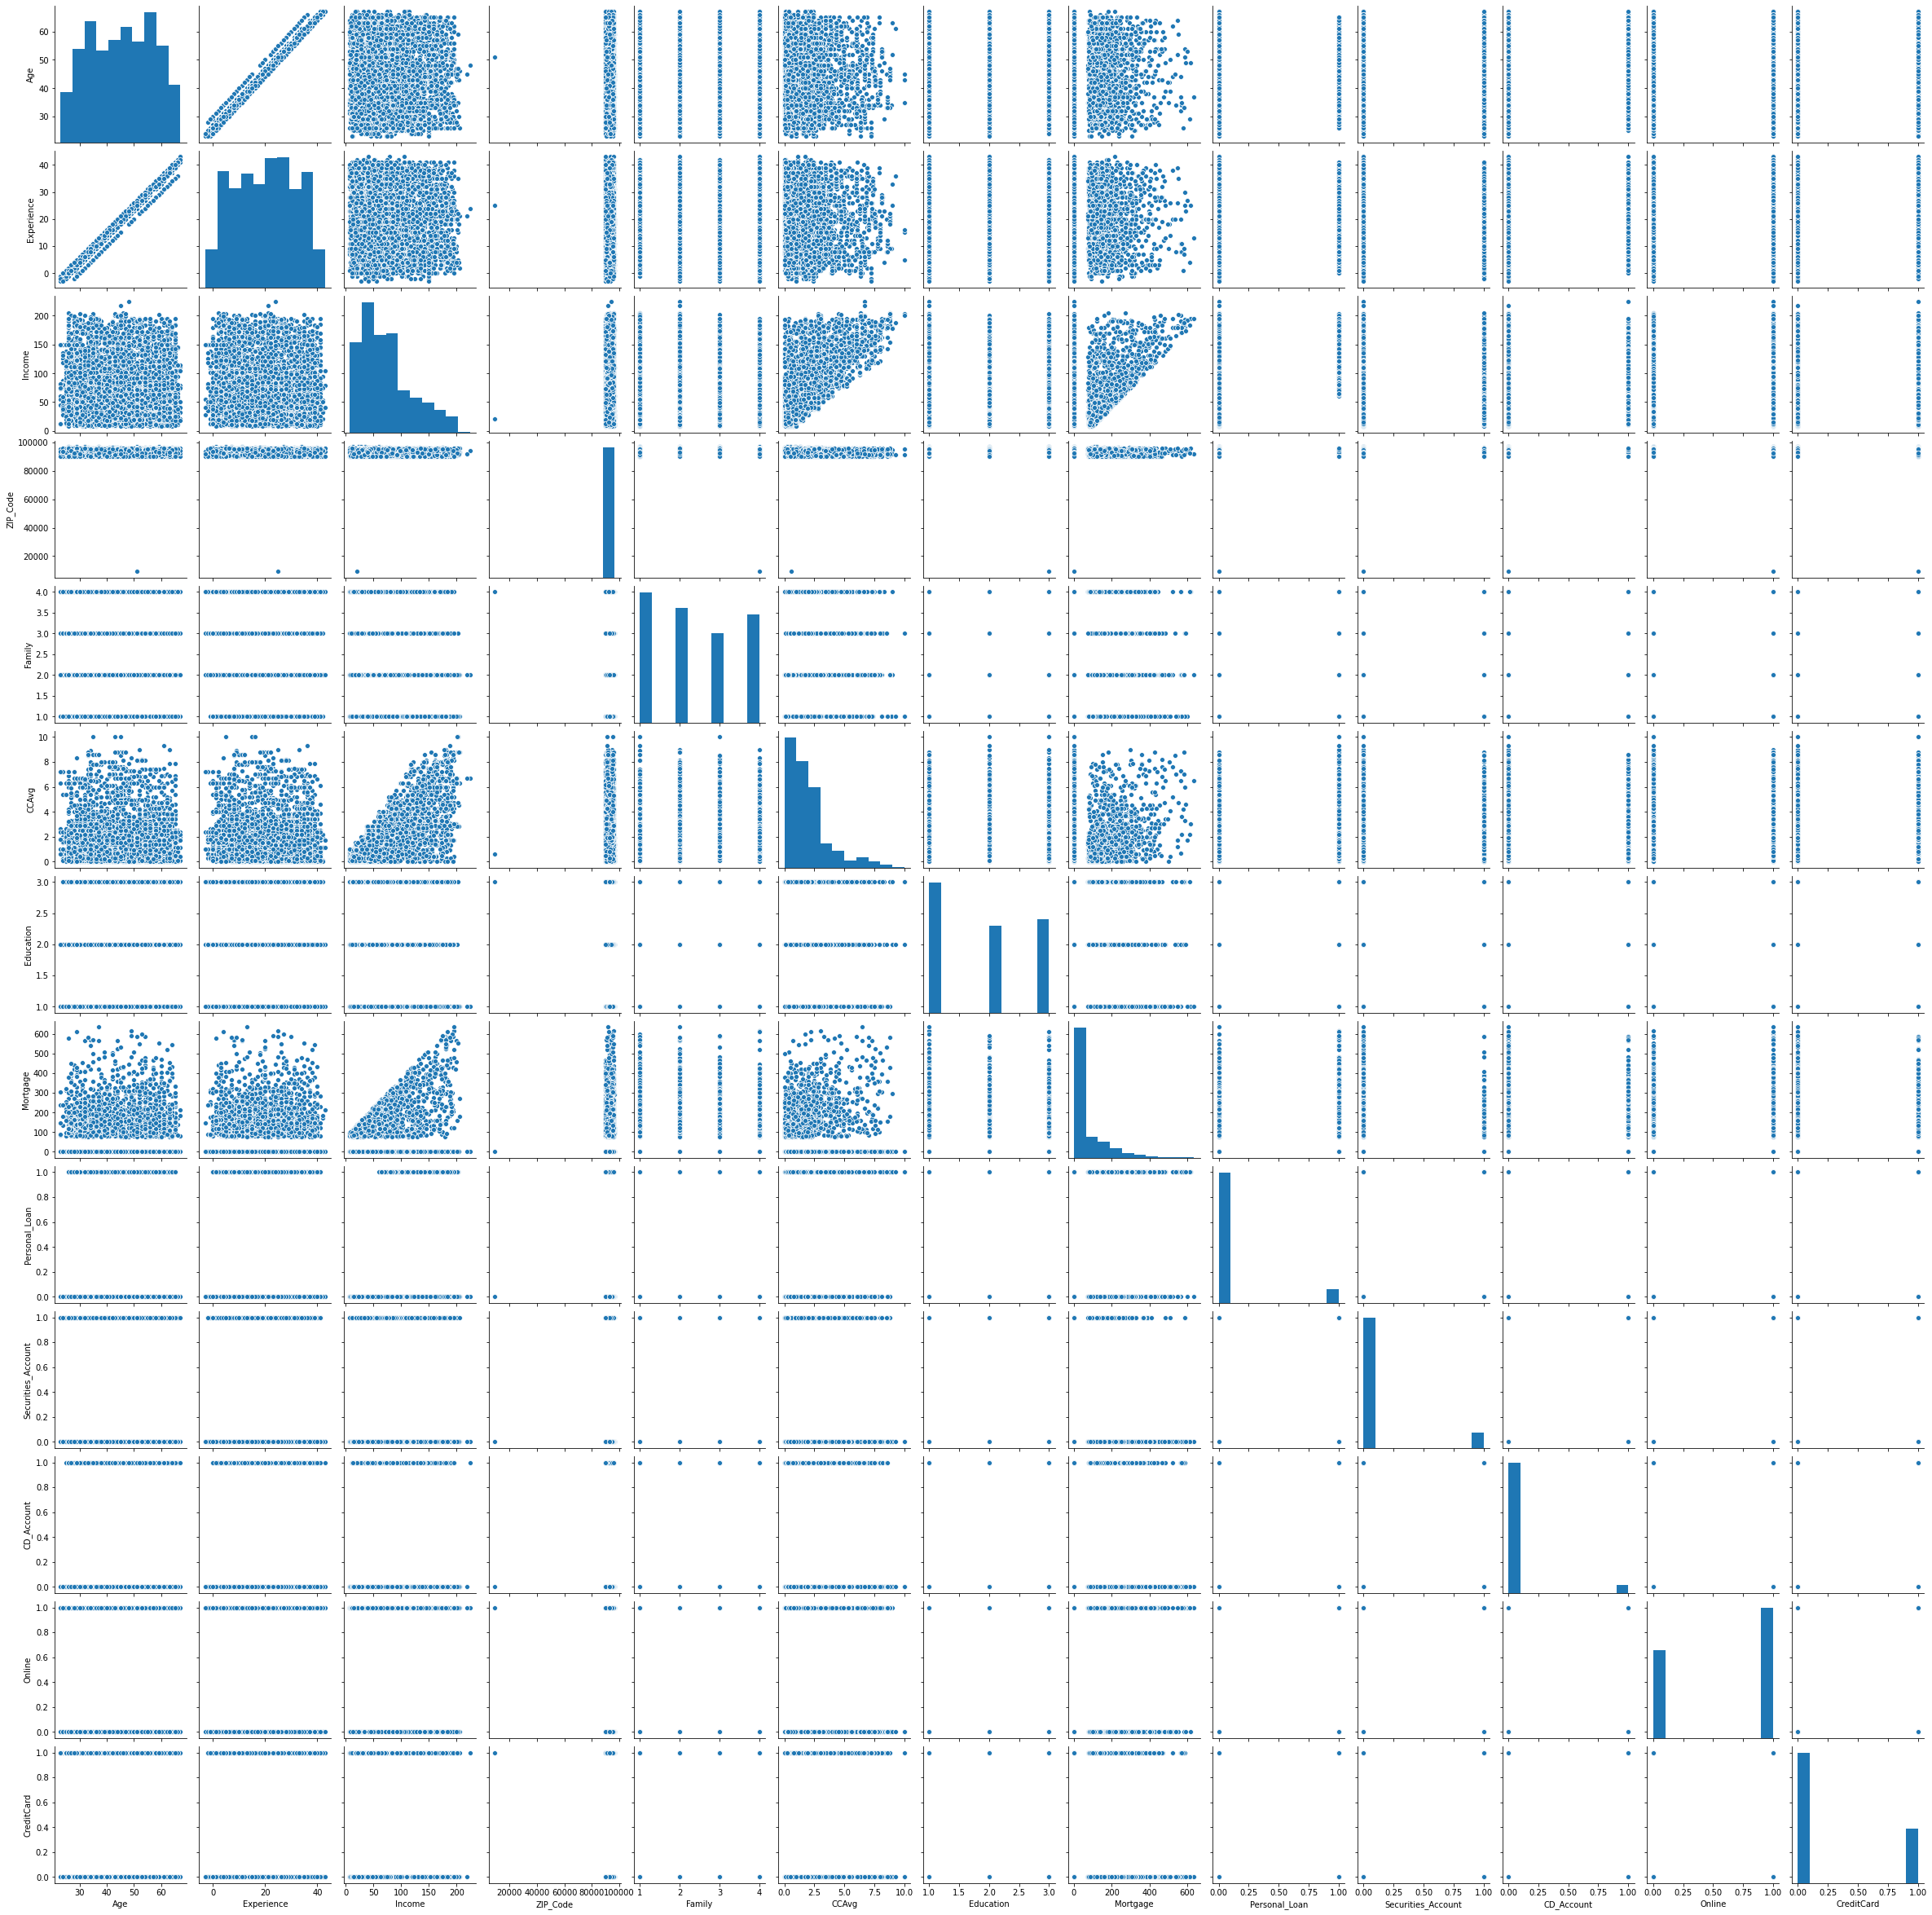

In [14]:
sns.pairplot(dataset.iloc[:,1:])
#creating every possible pair of columns graphically to see the correlation between each in a pair.

When there is a sequence we called them as a ordinary data. When there is no order or levels in the values we called it as nominal data. 

1. Age feature is normally distributed with majority of customers falling 
between 30 years and 60 years of age. 
(Mean is almost equal to median)

2. Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

3. Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.

4. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.

5. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.

The variables family and education are ordinal variables. The distribution of families is evenly distributes.

We can see in the data description and the above pairplot that 'experience' column has negative values. They thus produce discrepancies in data and we will remove them.

In [15]:
dataset[dataset['Experience'] < 0]['Experience'].count()
#counting how many records with negative experience

52

In [16]:
#modifying negative experience
#all positive values in dataExp
dataExp = dataset.loc[dataset['Experience'] >0]

#Putting all negative values in negExp
negExp = dataset.Experience < 0

column_name = 'Experience'
mylist = dataset.loc[negExp]['ID'].tolist()
#made a list of negative experience values
#getting the customer ID who has negative experience
#print(mylist) 

In [17]:
#52 records with negative experience in terms of False and True
#value count
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [18]:
for id in mylist:
    age = dataset.loc[np.where(dataset['ID']==id)]["Age"].tolist()[0]
    #For the record with the ID, get the value of Age column.
    
    education = dataset.loc[np.where(dataset['ID']==id)]["Education"].tolist()[0]
    #For the record with the ID, get the value of Education column.
    
    data_filtered = dataExp[(dataExp.Age == age) & (dataExp.Education == education)]
    #Filter the records matching the above criteria from the data frame 
    #which has records with positive experience and take the median.
    
    exp = data_filtered['Experience'].median()
    
    #Apply the median back to the location which had negative experience
    dataset.loc[dataset.loc[np.where(dataset['ID']==id)].index, 'Experience'] = exp
    
    #print(id,'|',age,'|', education,'|',exp)
    #print()
#print(data_filtered)

In [19]:
dataset[dataset['Experience'] < 0]['Experience'].count()
#now those 52 negative entries are present no more

0

In [20]:
dataset.describe().transpose()      #Again having a look at data for the experience column

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [21]:
#finding correlation (age and income)
experience = dataset['Income']
age=dataset['Age']
correlation=experience.corr(age)
correlation

#we will drop some columns later after plotting some graphs for display

-0.05526861817998508

Zip code has 467 distinct values. It is a nominal variable which has too many levels. It's better to drop Zip code.

In [22]:
dataset = dataset.drop('ZIP_Code' , axis = 1)

Dropping ID as not required now. It does not give any information about data. Instead it is just a number in series.

In [23]:
dataset = dataset.drop('ID' , axis = 1)
dataset

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,3,0,0,0,0,1,0
4996,30,4.0,15,4,0.4,1,85,0,0,0,1,0
4997,63,39.0,24,2,0.3,3,0,0,0,0,0,0
4998,65,40.0,49,3,0.5,2,0,0,0,0,1,0


# EDA

In [24]:
#Finding Unique Values

print(dataset.nunique())
#or: dataset.apply(lambda x: len(x.unique()))

Age                    45
Experience             44
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64


Mortgage column has 347 unique values

Number of people with zero mortgage:

In [25]:
# No. of People with 0 mortgage
# There are 3462 people with 0 mortgage out of 5000(making it skewed)
(dataset.Mortgage == 0).sum()

3462

Number of people with zero credit card expenditure per month.

In [26]:
# No. of people with zero credit card spending per month
# There are 106 people with zero average credit card spending per month
(dataset.CCAvg == 0).sum()

106

Value counts of all categorical columns

In [27]:
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [28]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [29]:
dataset['Securities_Account'].value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

In [30]:
dataset['CD_Account'].value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

In [31]:
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [32]:
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

Univariate Analysis

Here we have to understand each feature or a single variable. One of the best plot to understand the single variable is the distplot.

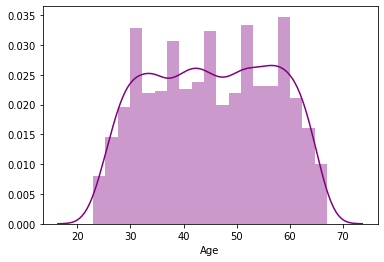

In [33]:
# Univariate Analysis
sns.distplot(dataset.Age, color="purple");

Age seems to have symmetric Distribution.

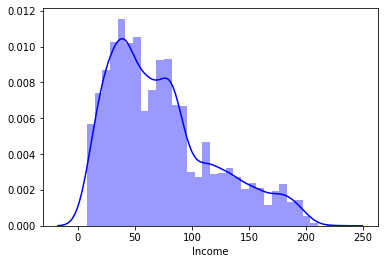

In [34]:
## Income is right skewed Distribution
sns.distplot(dataset.Income, color="blue");

Income is skewed. It needs to be normalised.


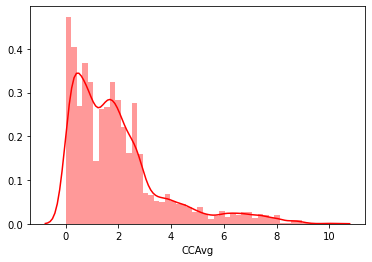

In [35]:
## Credit Card average is right skewed Distribution
sns.distplot(dataset.CCAvg, color="red");

Credit Card Average is also skewed, it also needs to be normalized.

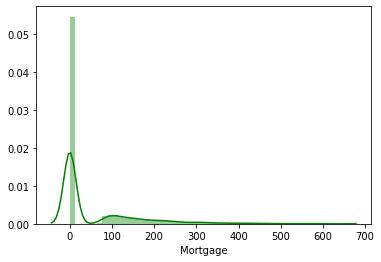

In [36]:
## Mortgage column seems highly skewed
sns.distplot(dataset.Mortgage, color="green");

Mortgage is highly skewed, it also needs to be normalized.

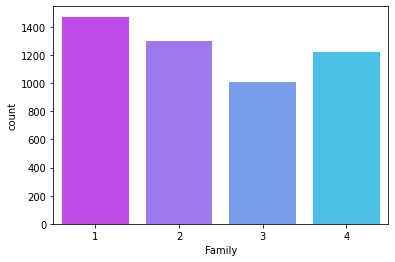

In [37]:
sns.countplot(dataset.Family, palette='cool_r');

Above plot is a graph of the count of values in a dataset.

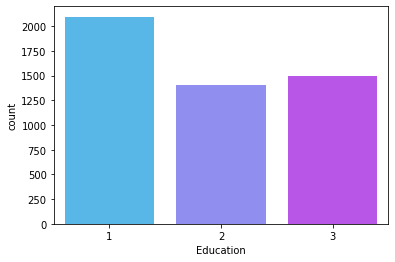

In [38]:
sns.countplot(dataset.Education, palette='cool');

Above plot is a graph of the count of values in a dataset.

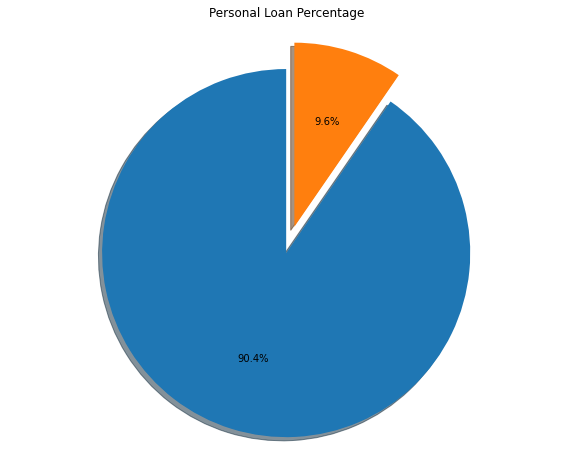

In [39]:
#Removing Warnings beforehand
import warnings
warnings.filterwarnings('ignore')

#Univariate Analysis

tempDF =pd.DataFrame(dataset["Personal_Loan"].value_counts()).reset_index()   
tempDF.column = ["Lables","Personal_Loan"]
figl, axl = plt.subplots(figsize=(10,8), edgecolor='orange')
explode = (0, 0.15)

#making pie chart
axl.pie(tempDF["Personal_Loan"], explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
axl.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()

# 9.6 % all the applicats get approved for personal loan

Multivarate

Influence of income and education on personal loan

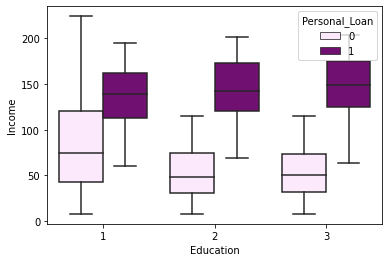

In [40]:
# It seems the customers who have more income is granted loan across each education level
sns.boxplot(x='Education' ,y= 'Income' ,hue='Personal_Loan' ,data=dataset, color='purple');

Observation : It seems the customers whose education level is 1, are having more income. However customers who have taken the personal loan have the same income levels.

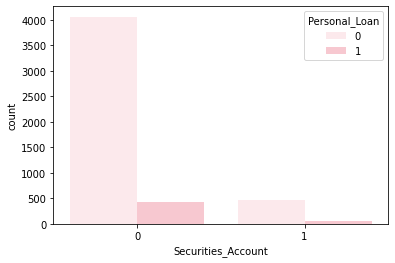

In [41]:
# Most of the people having Securities Account and don't have personal loan
sns.countplot(x="Securities_Account", data=dataset,hue="Personal_Loan", color='pink');

Most of the people having Securities Account and don't have personal loan

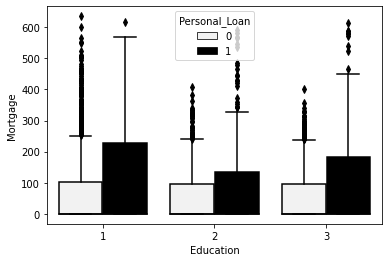

In [42]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal_Loan", data=dataset,color='black')
#Relation of education, mortgage with personal loan

Inference : From the above chart it seems that customers who do not have personal loan and customers who have personal loan have high mortgage

Observation : Majority of customers who do not have loan have securities account.

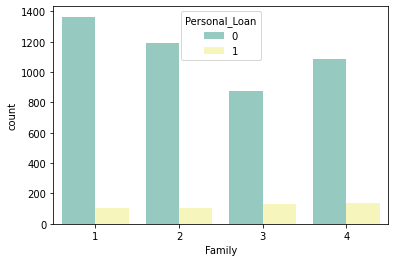

In [43]:
sns.countplot(x='Family',data=dataset,hue='Personal_Loan',palette='Set3')
#family w.r.t personal-loan

Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

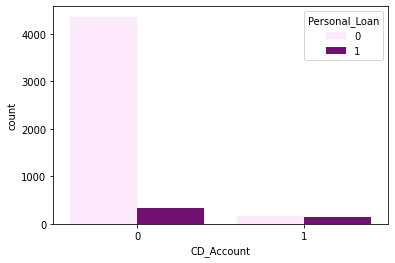

In [44]:
sns.countplot(x='CD_Account',data=dataset,hue='Personal_Loan', color='purple')
#relation between cdaccount and personal-loan

Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

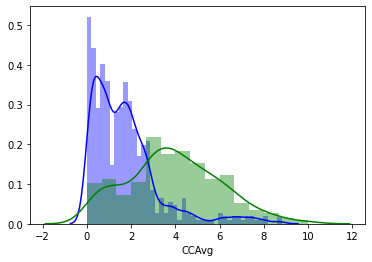

In [45]:
sns.distplot( dataset[dataset.Personal_Loan == 0]['CCAvg'], color = 'b')
sns.distplot( dataset[dataset.Personal_Loan == 1]['CCAvg'], color = 'g')

Observation: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

In [46]:
print('Credit card spending (Non-Loan customers): ',dataset[dataset.Personal_Loan == 0]['CCAvg'].median()*1000)
print('Credit card spending (Loan customers)    : ',dataset[dataset.Personal_Loan == 1]['CCAvg'].median()*1000)

Credit card spending (Non-Loan customers):  1400.0
Credit card spending (Loan customers)    :  3800.0


Above data may come useful.
It shows expenditure via credit cards for Loan and Non-Loan customers

Text(0, 0.5, 'Age')

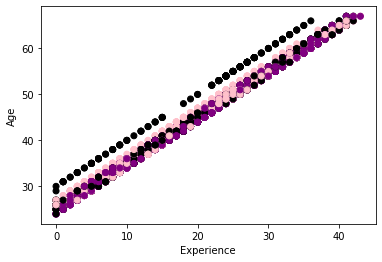

In [47]:
#scatter plot for experience, age, education
fig, ax = plt.subplots()
colors = {1:'purple',2:'pink',3:'black'}
ax.scatter(dataset['Experience'],dataset['Age'],c=dataset['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

In [48]:
dataset = dataset.drop('Experience' , axis = 1)
#dropping experience- not required as it has many unique values we saw in the start
#also it does not put that much of a relation, so it is not required
dataset

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


Observation: The above plot shows that experience and age have a positive correlation. As experience increases age also increases. Also the colors show the education level. There is gap in the mid forties age and also more people in the under graduate level

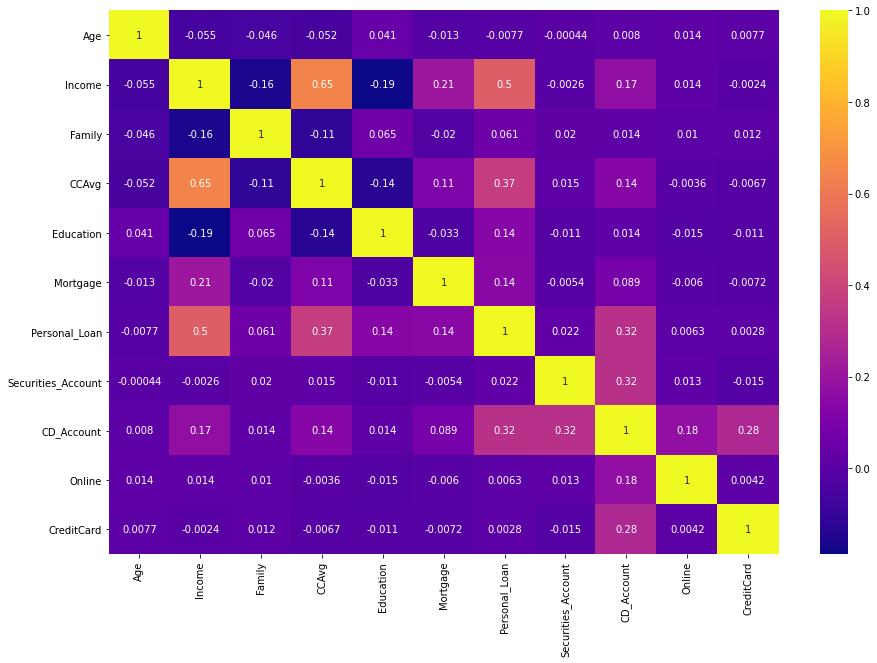

In [49]:
# Experinece after dropping doesn't seem to be significant correlation between other variables except credit card, average and income
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='plasma' , annot=True) ;

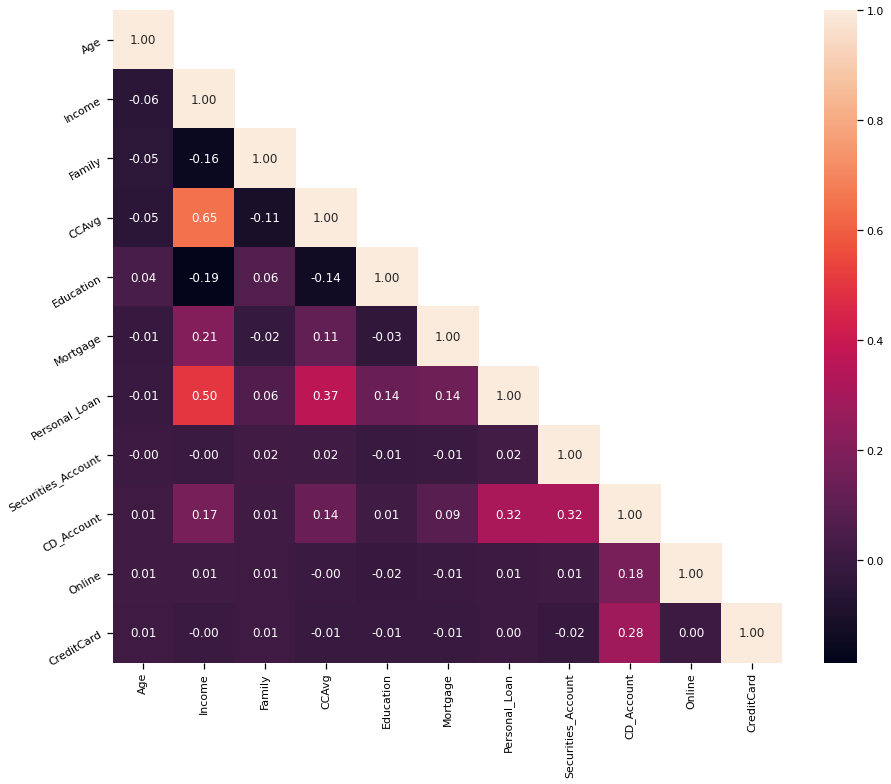

In [50]:
#another heatmap

corr = dataset.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3})
plt.figure(figsize=(15,12))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#generating heat map
## ## ## ## ##

Observation

Income and CCAvg is moderately correlated.

Age and Experience is highly correlated.

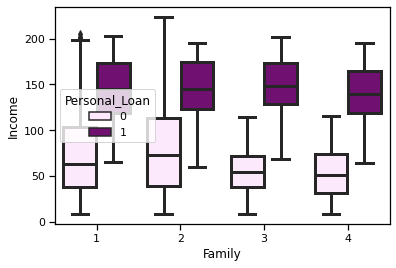

In [51]:
sns.boxplot(x=dataset.Family, y=dataset.Income, hue=dataset.Personal_Loan, color= 'purple')
#relation between Family and Income

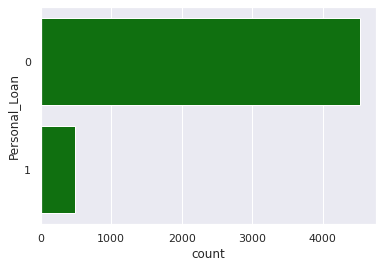

In [52]:
sns.set(style="darkgrid", color_codes=True)
sns.countplot(y='Personal_Loan', data=dataset, color = 'green')
#majority of people are not taking personal loans

# Transformation of feature variables

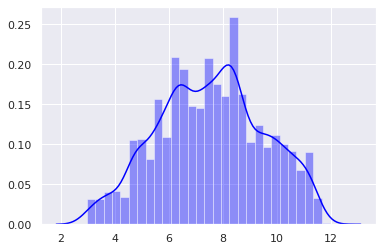

In [53]:
from sklearn.preprocessing import PowerTransformer          
#importing Power Transformer for transformation

pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(dataset["Income"].values.reshape(-1, 1))
temp = pt.transform(dataset["Income"].values.reshape(-1, 1))

sns.distplot(temp, color='blue');
#skewness in the income is removed.

The data in the Income column has been normalised.

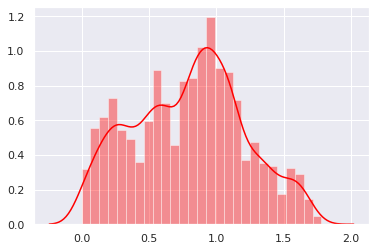

In [54]:
#same for CCAvg
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(dataset["CCAvg"].values.reshape(-1, 1))
temp = pt.transform(dataset["CCAvg"].values.reshape(-1, 1))
sns.distplot(temp, color='red');
#skewness in CCAvg column removed

The data in the CCAvg column has been normalised.

In [55]:
dataset["Mortgage_Int"] = pd.cut(dataset["Mortgage"], bins=[0, 100, 200, 300, 400, 500, 600, 700], labels=[0, 1, 2, 3, 4, 5, 6], include_lowest=True)
dataset.drop("Mortgage" , axis=1, inplace=True)

In [56]:
dataset.head()
#see the mortgage column values are now stored in mortgage_int column, which is put ata the end.

,Age,Income,Family,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mortgage_Int
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0


In [57]:
dataset["PersonalLoan"] = dataset['Personal_Loan']
dataset.drop("Personal_Loan", axis=1, inplace=True)
dataset.head(10)
#brought Personal_loan column to the end


,Age,Income,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard,Mortgage_Int,PersonalLoan
0,25,49,4,1.6,1,1,0,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0,0
5,37,29,4,0.4,2,0,0,1,0,1,0
6,53,72,2,1.5,2,0,0,1,0,0,0
7,50,22,1,0.3,3,0,0,0,1,0,0
8,35,81,3,0.6,2,0,0,1,0,1,0
9,34,180,1,8.9,3,0,0,0,0,0,1


The last column is the dependent column which we have to find for the test data or new values in the future

# Splitting the dataset into train-set and test-set

In [58]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# X refers to the matrix of features(independent)
# y is the dependent variable

The above code separeted independent values(X) and dependent values(y)

Since the dependent column is the last column, we have written '-1', thus starting from reverse and selecting last column for dependent column as y.

For X, all columns except the last column(-1) are independent column on the basis of which we will determine whther the person will take the personal loan or not.

(-1 means the first column encounterd fron the end)

In [59]:
#splitting the model into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

We have splitted the data in 70:30 ratio for training and testing.
i.e., 70% data for training and 30% data for testing.

In [60]:
print(X_train) #sample display of independent values of training set

[[36 158 2 ... 1 1 1]
 [59 102 4 ... 1 0 1]
 [58 43 2 ... 1 0 0]
 ...
 [26 24 2 ... 0 1 1]
 [57 49 4 ... 1 1 2]
 [33 38 1 ... 0 0 1]]


In [61]:
print(y_train) #sample display of dependent values of training set

[0 1 0 ... 0 0 0]


In [62]:
print(X_test) #sample display of independent values of testing set

[[54 23 2 ... 0 0 0]
 [33 83 1 ... 1 0 0]
 [54 72 3 ... 0 1 2]
 ...
 [33 122 1 ... 1 1 0]
 [35 55 2 ... 1 0 0]
 [55 53 1 ... 0 0 0]]


In [63]:
print(y_test) #sample display of dependent values of testing set

[0 0 0 ... 0 0 0]


# Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#fit and transform train data
X_train = sc.fit_transform(X_train)

#transform test data
X_test = sc.transform(X_test)

We have now scaled the data

# Logistic Regression

In [65]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#Training the logistic regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)           #declaring as an object
classifier.fit(X_train, y_train)                            #fitting

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pred2 = classifier.predict(X_train)         #predicting train set values
y_pred = classifier.predict(X_test)           #predicting test set values
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_train.reshape(len(y_train),1)),1))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#reshaping to np array(2D)

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
LR2 = accuracy_score(y_train, y_pred2)
print('LR Training Accuracy:',LR2)
LR = accuracy_score(y_test, y_pred)
print('LR Testing Accuracy:',LR)

[[1353   19]
 [  50   78]]

LR Training Accuracy: 0.9511428571428572
LR Testing Accuracy: 0.954


In [68]:
print("Recall:",recall_score(y_test, y_pred))
print()
print("Precision:",precision_score(y_test, y_pred))
print()
print("F1 Score:",f1_score(y_test, y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test, y_pred))
print()

Recall: 0.609375

Precision: 0.8041237113402062

F1 Score: 0.6933333333333334

Roc Auc Score: 0.7977633017492711



# KNN
K-NEAREST NEIGHBORS

In [69]:
#training the knn model
from sklearn.neighbors import KNeighborsClassifier                                      #importing KNN classifier
classifier = KNeighborsClassifier(n_neighbors = 35, metric = 'minkowski', p = 2)        #declaring classifier as object
classifier.fit(X_train, y_train)                                                        #fitting

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [70]:
y_pred2 = classifier.predict(X_train)         #predicting values for train data
y_pred = classifier.predict(X_test)           #predicting values for test data
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_train.reshape(len(y_train),1)),1))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#reshaped to np array(2D)

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [71]:
#matrices
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,  precision_score, f1_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)    #confusion matrix for test data
print(cm)
print()
KNN2 = accuracy_score(y_train, y_pred2)  #training accuracy-score
print('KNN Training accuracy:',KNN2)   
KNN = accuracy_score(y_test, y_pred)     #testing accuracy-score
print('KNN Testing accuracy:',KNN)   

[[1367    5]
 [  73   55]]

KNN Training accuracy: 0.9408571428571428
KNN Testing accuracy: 0.948


In [72]:
print("Recall:",recall_score(y_test, y_pred))
print()
print("Precision:",precision_score(y_test, y_pred))
print()
print("F1 Score:",f1_score(y_test, y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test, y_pred))
print()

Recall: 0.4296875

Precision: 0.9166666666666666

F1 Score: 0.5851063829787234

Roc Auc Score: 0.7130215925655977



# SVM
SUPPORT VECTOR MACHINE

In [73]:
from sklearn.svm import SVC                               #importing Support Vector Classifier
classifier = SVC(kernel = 'linear', random_state = 0)     #declaring as object
classifier.fit(X_train, y_train)                          #fitting

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [74]:
y_pred2 = classifier.predict(X_train)       #predicting train data
y_pred = classifier.predict(X_test)         #predicting test data
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_train.reshape(len(y_train),1)),1))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#reshaped to np array(2D)

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [75]:
#matrices
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)     #confusion matrix for test data
print(cm)
print()
SVM2 = accuracy_score(y_train, y_pred2)   #training accuracy score
print('SVM Training accuracy:',SVM2)       
SVM = accuracy_score(y_test, y_pred)      #testing accuracy score
print('SVM Testing accuracy:',SVM)

[[1357   15]
 [  54   74]]

SVM Training accuracy: 0.954
SVM Testing accuracy: 0.954


In [76]:
print("Recall:",recall_score(y_test, y_pred))
print()
print("Precision:",precision_score(y_test, y_pred))
print()
print("F1 Score:",f1_score(y_test, y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test, y_pred))
print()

Recall: 0.578125

Precision: 0.8314606741573034

F1 Score: 0.6820276497695853

Roc Auc Score: 0.783596027696793



# Kernel SVM

In [77]:
from sklearn.svm import SVC                                   #importing Support Vector Classifier
classifier = SVC(kernel = 'rbf', random_state = 8)            #declaring as an object
classifier.fit(X_train, y_train)                              # fitting

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

In [78]:
y_pred = classifier.predict(X_test)   #predicting test data's dependent variable
y_pred2 = classifier.predict(X_train) #predicting train data's dependent variable
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_train.reshape(len(y_train),1)),1))
#reshaped to np array(2D)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [79]:
#matrices
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
#training accuracy score
KSVM2 = accuracy_score(y_train, y_pred2)
print('KSVM Training accuracy',KSVM2)
#testing accuracy score
KSVM = accuracy_score(y_test, y_pred)
print('KSVM Testing accuracy',KSVM)

[[1369    3]
 [  35   93]]

KSVM Training accuracy 0.9794285714285714
KSVM Testing accuracy 0.9746666666666667


In [80]:
print("Recall:",recall_score(y_test, y_pred))
print()
print("Precision:",precision_score(y_test, y_pred))
print()
print("F1 Score:",f1_score(y_test, y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test, y_pred))
print()

Recall: 0.7265625

Precision: 0.96875

F1 Score: 0.8303571428571429

Roc Auc Score: 0.8621879555393587



# Naive Bayes

In [81]:
#importing Gaussian NB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()                   #declaring as object
classifier.fit(X_train, y_train)            #fitting

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
y_pred = classifier.predict(X_test)   #predicting test variable y
y_pred2= classifier.predict(X_train)  #predicting train varaible y
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_train.reshape(len(y_train),1)),1))
#reshaped to np array(2D)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[1 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [1 0]
 [0 0]]


In [83]:
#matrices
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
#training accuracy score
NB2 = accuracy_score(y_train,y_pred2)
print('NB Training Accuracy:', NB2)
#testing accuracy score
NB = accuracy_score(y_test, y_pred)
print('NB Testing Accuracy:', NB)

[[1255  117]
 [  50   78]]

NB Training Accuracy: 0.8797142857142857
NB Testing Accuracy: 0.8886666666666667


In [84]:
print("Recall:",recall_score(y_test, y_pred))
print()
print("Precision:",precision_score(y_test, y_pred))
print()
print("F1 Score:",f1_score(y_test, y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test, y_pred))
print()

Recall: 0.609375

Precision: 0.4

F1 Score: 0.4829721362229103

Roc Auc Score: 0.7620490160349854



# Decision Tree Classificstion

In [85]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=8) #declaring as object
classifier.fit(X_train, y_train)                                                          #fitting

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [86]:
y_pred = classifier.predict(X_test)   #predicting test data
y_pred2= classifier.predict(X_train)  #predicting train data

#reshaping to np array(2D)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_train.reshape(len(y_train),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [87]:
#matrices
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

#training accuracy score
DTC2 =accuracy_score(y_train, y_pred2)
print('DTC Training accuracy:', DTC2)

#testing accuracy score
DTC = accuracy_score(y_test, y_pred)
print('DTC Testing Accuracy',DTC)

[[1362   10]
 [  18  110]]

DTC Training accuracy: 0.9922857142857143
DTC Testing Accuracy 0.9813333333333333


In [88]:
print("Recall Score:",recall_score(y_test, y_pred))
print()
print("Precision Score:",precision_score(y_test, y_pred))
print()
print("F1 Score:",f1_score(y_test, y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test, y_pred))
print()

Recall Score: 0.859375

Precision Score: 0.9166666666666666

F1 Score: 0.8870967741935484

Roc Auc Score: 0.9260431851311953



# Random Forest Classificstion

In [89]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#declaring it as an object
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0, max_depth=8)

#fitting
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [90]:
#predicting test values
y_pred = classifier.predict(X_test)

#predicting train values
y_pred2= classifier.predict(X_train)

#reshaping to np array(2D)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_train.reshape(len(y_train),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [91]:
#matrices
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

#training accuracy score
RFC2= accuracy_score(y_train, y_pred2)
print('RFC Training Accuracy:',RFC2)

#testing accuracy score
RFC = accuracy_score(y_test, y_pred)
print('RFC Testing Accuracy:',RFC)

[[1368    4]
 [  17  111]]

RFC Training Accuracy: 0.9945714285714286
RFC Testing Accuracy: 0.986


In [92]:
print("Recall Score:",recall_score(y_test, y_pred))
print()
print("Precision Score:",precision_score(y_test, y_pred))
print()
print("F1 Score:",f1_score(y_test, y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test, y_pred))
print()

Recall Score: 0.8671875

Precision Score: 0.9652173913043478

F1 Score: 0.9135802469135802

Roc Auc Score: 0.9321360240524781



# Accuracies at a glance

In [97]:
print('Model', ' ------Train-------','|', '---Test')
print()
print('LR    ', LR2,'|', LR)
print()
print('KNN   ', KNN2,'|', KNN)
print()
print('SVM   ', SVM2,'             |', SVM)
print()
print('KSVM  ', KSVM2,'|', KSVM)
print()
print('NB    ', NB2,'|', NB)
print()
print('DTC   ', DTC2,'|', DTC)
print()
print('RFC   ', RFC2,'|', RFC)

Model  ------Train------- | ---Test

LR     0.9511428571428572 | 0.954

KNN    0.9408571428571428 | 0.948

SVM    0.954              | 0.954

KSVM   0.9794285714285714 | 0.9746666666666667

NB     0.8797142857142857 | 0.8886666666666667

DTC    0.9922857142857143 | 0.9813333333333333

RFC    0.9945714285714286 | 0.986


# COMPARISON of above models

In [94]:
#initialising a list of models, declared empty first
models = []

#appending all models in the models list
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=35)))
models.append(('Support Vector Machine', SVC(kernel = 'linear')))
models.append(('Kernel SVM', SVC(kernel = 'rbf')))
models.append(('Gaussian/Naive-Bayes', GaussianNB()))
models.append(('Decision-Tree', DecisionTreeClassifier()))
models.append(('Random-Forest',RandomForestClassifier(max_depth = 8, n_estimators = 500)))

In [95]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn import model_selection

results = []
model_names = []

#using kfold(Provides train/test indices to split data in train/test sets)
#Split dataset into k consecutive folds (without shuffling by default)
#Now, iterating through the models list
for m_name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=70)
    results_cv=model_selection.cross_val_score(model,X_test,y_test,cv=kfold,scoring='accuracy')
    #scoring on the basis of accuracy
    results.append(results_cv)
    model_names.append(m_name)
    fin = "{}: {}".format(m_name, results_cv.mean())
    print(fin)   

Logistic Regression: 0.9560000000000001
K-Nearest Neighbors: 0.9313333333333332
Support Vector Machine: 0.9573333333333333
Kernel SVM: 0.968
Gaussian/Naive-Bayes: 0.8913333333333332
Decision-Tree: 0.9746666666666666
Random-Forest: 0.9813333333333334


Random Forest Performs the Best out of all 7 models.

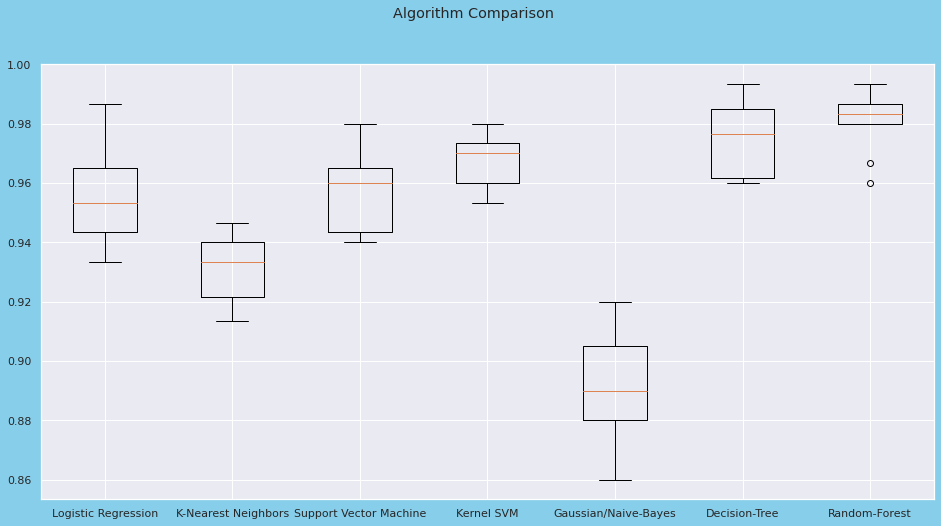

In [96]:
# a boxplot to show comparison among all models
fig = plt.figure(figsize=(16, 8), facecolor='skyblue')
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

Conclusion:
    
The bank aims to convert their liability customers into loan customers. They want to set up a new marketing campaign; hence, they needed information about the connection between the variables given in the data. 
The department wanted you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
    
Seven classification algorithms were used in this project. 
The confusion-matrices, accuracies, precision-score, recall-score, roc-auc score and f1-score of all the models have been mentioned. Thus we get a detailed insight of every model used. 

From the above graph , it seems like Random Forest algorithm has the highest accuracy and we can choose that as our final model!

Using this model, we can correctly predict the likelihood of a liability customer buying personalloans.

      # Divyanshi Parashar

SCOREBARD:

1: Random Forest!!! 

2: Decision Tree

3: Kernel SVM

4: SVM

5: Logistic Regression

6: KNN

7: Naive Bayes


Thank You!
   
# Divyanshi Parashar